Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
from molmod import *
from molmod.io import FCHKFile
from molmod.io.xyz import XYZReader, XYZFile
import requests

In [39]:
erep_pattern = re.compile("nuclear repulsion energy")
dipole_pattern = "Dipole moment (field-independent basis, Debye)"
edisp_pattern = re.compile("Nuclear repulsion after empirical dispersion term")
homo_pattern = re.compile("Alpha  occ. eigenvalues")
polarizability_ex_pattern = re.compile("Dipole polarizability, Alpha")

print(2)

In [40]:
print("""
|__database
|    |__logfiles
|    |  |__*
|    |
|    |__logfilessplit
|    |__pdb
|       |__from_rcsb_old
|       |__prepared
|
|__heme.ipynb
|__split_traj_com.tcl
|__plots
|__tables
""")


|__database
|    |__logfiles
|    |  |__*
|    |
|    |__logfilessplit
|    |__pdb
|       |__from_rcsb_old
|       |__prepared
|
|__heme.ipynb
|__split_traj_com.tcl
|__plots
|__tables



In [41]:
print(os.getcwd())
os.chdir("database/pdb")
os.system('vmd -dispdev text -e split_traj_com.tcl ')
os.system('mv *.pdb from_rcsb_old')
os.chdir("../..")


/home/hagen/dokumente/Masterarbeit/hemejpn


get_dihed.py

In [42]:
class porphyr:
    defaultdihedlist = [[0, 4, 2, 1], [0, 4, 2, 3], [0, 4, 6, 5], [0, 4, 6, 19], [0, 10, 8, 7], [0, 10, 8, 9], [0, 10, 12, 1], [0, 10, 12, 11], [0, 16, 14, 13], [0, 16, 14, 15], [0, 16, 18, 7], [0, 16, 18, 17], [0, 22, 20, 19], [0, 22, 20, 21], [0, 22, 24, 13], [0, 22, 24, 23], [1, 2, 3, 5], [1, 2, 4, 0], [1, 2, 4, 6], [1, 12, 10, 0], [1, 12, 10, 8], [1, 12, 11, 9], [2, 1, 12, 10], [2, 1, 12, 11], [2, 4, 0, 10], [2, 4, 0, 16], [2, 4, 0, 22], [2, 4, 6, 19], [3, 2, 1, 12], [3, 2, 4, 0], [3, 5, 6, 19], [4, 0, 10, 8], [4, 0, 10, 12], [4, 0, 16, 14], [4, 0, 16, 18], [4, 0, 22, 20], [4, 0, 22, 24], [4, 2, 1, 12], [4, 6, 19, 20], [5, 3, 2, 1], [5, 6, 4, 0], [5, 6, 19, 20], [6, 4, 0, 10], [6, 4, 0, 16], [6, 4, 0, 22], [6, 4, 2, 1], [6, 19, 20, 21], [6, 19, 20, 22], [7, 8, 9, 11], [7, 8, 10, 0], [7, 8, 10, 12], [7, 18, 16, 0], [7, 18, 16, 14], [7, 18, 17, 15], [8, 7, 18, 16], [8, 7, 18, 17], [8, 10, 0, 4], [8, 10, 0, 16], [8, 10, 0, 22], [8, 10, 12, 1], [9, 8, 7, 18], [9, 8, 10, 0], [9, 11, 12, 1], [10, 0, 4, 2], [10, 0, 4, 6], [10, 0, 16, 14], [10, 0, 16, 18], [10, 0, 22, 20], [10, 0, 22, 24], [10, 8, 7, 18], [10, 12, 1, 2], [11, 9, 8, 7], [11, 12, 1, 2], [11, 12, 10, 0], [12, 1, 2, 3], [12, 1, 2, 4], [12, 10, 0, 4], [12, 10, 0, 16], [12, 10, 0, 22], [12, 10, 8, 7], [13, 14, 15, 17], [13, 14, 16, 0], [13, 14, 16, 18], [13, 24, 22, 0], [13, 24, 22, 20], [13, 24, 23, 21], [14, 13, 24, 22], [14, 13, 24, 23], [14, 16, 0, 4], [14, 16, 0, 10], [14, 16, 0, 22], [14, 16, 18, 7], [15, 14, 13, 24], [15, 14, 16, 0], [15, 17, 18, 7], [16, 0, 4, 2], [16, 0, 4, 6], [16, 0, 10, 8], [16, 0, 10, 12], [16, 0, 22, 20], [16, 0, 22, 24], [16, 14, 13, 24], [16, 18, 7, 8], [17, 15, 14, 13], [17, 18, 7, 8], [17, 18, 16, 0], [18, 7, 8, 9], [18, 7, 8, 10], [18, 16, 0, 4], [18, 16, 0, 10], [18, 16, 0, 22], [18, 16, 14, 13], [19, 6, 4, 0], [19, 6, 4, 2], [19, 6, 5, 3], [19, 20, 21, 23], [19, 20, 22, 0], [19, 20, 22, 24], [20, 19, 6, 4], [20, 19, 6, 5], [20, 22, 0, 4], [20, 22, 0, 10], [20, 22, 0, 16], [20, 22, 24, 13], [21, 20, 19, 6], [21, 20, 22, 0], [21, 23, 24, 13], [22, 0, 4, 2], [22, 0, 4, 6], [22, 0, 10, 8], [22, 0, 10, 12], [22, 0, 16, 14], [22, 0, 16, 18], [22, 20, 19, 6], [22, 24, 13, 14], [23, 21, 20, 19], [23, 24, 13, 14], [23, 24, 22, 0], [24, 13, 14, 15], [24, 13, 14, 16], [24, 22, 0, 4], [24, 22, 0, 10], [24, 22, 0, 16], [24, 22, 20, 19]]
    calldict = {}
    def namema(self,liste):
        return [self.calldict[i] for i in liste]

    def getorders(self,lis):
        return [self.order.index(i) for i in lis]

    def getorder(self,elem):
        return self.order.index(elem)

    def sortorder(self,lis):
        return sorted(lis, key = self.getorder)

    def take_first(self,elem):
        return self.order.index(elem[0])

    def take_second(self,elem):
        return self.order.index(elem[1])

    def take_third(self,elem):
        return self.order.index(elem[2])

    def take_fourth(self,elem):
        return self.order.index(elem[3])


#____________________________________________________________________________________ possible tools for debugging  ____________________________________________________

    def get_compassid(self,listofindizies):
        return [self.compassdict[i] for i in listofindizies]

    def compassorder(self):
        return( [self.get_compassid([self.order[i] for i in dfd ]  ) for dfd in self.defaultdihedlist] )     

    def get_compassname(self,listofindizies):
        strlist = [self.compassdict[i] for i in listofindizies]
        name = strlist[0]
        for n  in strlist[1:] :
            name = name +"_"+n #strlist[i]
        return name
    def compassordername(self):
        return( [self.get_compassname([self.order[i] for i in dfd ]  ) for dfd in self.defaultdihedlist] )     

    def neighbourlist(self):
        for i in self.order:
            print(i," - ",list(self.mol.graph.neighbors[i]))

    def porphycompass(self,Fe, NC2O, C1_NO, C3_NO, N_N, C3_NW, C1_NW ,WC2N, C1_WN, C3_WN, N_W, C3_WS, C1_WS, SC2W, C1_SW, C3_SW, N_S, C3_SO, C1_SO , OC2S, C1_OS, C3_OS, N_O, C3_ON, C1_ON  ):
        print("          {}---{}					".format(C3_NW,C3_NO))
        print("          /      \ ")
        print("        {}       {}					".format(C1_NW,C1_NO))
        print("       /  \     /  \ ")
        print("    {}       {}      {}					".format(WC2N,N_N,NC2O))
        print("     |       |        | 					")
        print("  __{}       |       {}__					".format(C1_WN,C1_ON))
        print("{}    \      |      /     {}					".format(C3_WN,C3_ON))
        print("|      {}----{}----{}      |  					".format(N_W,Fe,N_O))
        print("{}__  /      |      \   __{}					".format(C3_WS,C3_OS))
        print("    {}       |       {}-					".format(C1_WS,C1_OS))
        print("     |       |        | 					")
        print("    {}       {}      {}					".format(SC2W,N_S,OC2S))
        print("       \   /    \   /  ")
        print("        {}       {}					".format(C1_SW,C1_SO))
        print("          \     /")
        print("          {}---{}						".format(C3_SW,C3_SO ))


    def porphycompassnumber(self):
        self.porphycompass(self.Fe, self.NC2O, self.C1_NO, self.C3_NO, self.N_N, self.C3_NW, self.C1_NW ,self.WC2N, self.C1_WN, self.C3_WN, self.N_W, self.C3_WS, self.C1_WS, self.SC2W, self.C1_SW, self.C3_SW, self.N_S, self.C3_SO, self.C1_SO , self.OC2S, self.C1_OS, self.C3_OS, self.N_O, self.C3_ON, self.C1_ON  )
        return "Jo"


    def porphyrcompassname(self):
        self.porphycompass(*self.get_compassid([self.Fe, self.NC2O, self.C1_NO, self.C3_NO, self.N_N, self.C3_NW, self.C1_NW , self.WC2N, self.C1_WN, self.C3_WN, self.N_W, self.C3_WS, self.C1_WS, self.SC2W, self.C1_SW, self.C3_SW, self.N_S, self.C3_SO, self.C1_SO , self.OC2S, self.C1_OS, self.C3_OS, self.N_O, self.C3_ON, self.C1_ON]))

#____________________________________________________________________________________ possible tools for debugging  _____________________________________________________

    def set_porphyr(self):
        angles = []
        for i1 in range(self.mol.size):
            n = list(self.mol.graph.neighbors[i1])
        for i1 in range(self.mol.size):
            n = list(self.mol.graph.neighbors[i1])
            if self.mol.numbers[i1] == 26:
                nofn = []
                NDict = {}
                for N in n:
                    C1 = list(self.mol.graph.neighbors[N])
                    C1Dict ={}
                    for nn in n:
                        try:
                            C1.remove(nn)
                        except:
                            2
                    for c1 in C1:
                        C2 = list(self.mol.graph.neighbors[c1])
                        C1Dict.update({c1:C2})
                        for nn in n:
                            try:
                                C2.remove(nn)
                            except:
                                2
                    NDict.update({N:C1Dict})
                allof = [[[c2 for c2 in c1 ]for c1 in N.values()] for N in NDict.values()]
                c =  []
                for a in allof:
                    for b in a:
                        c = c + b
                self.por_index = []
                for k,N in zip (NDict.keys(),NDict.values()):
                    for c1 in N.values():
                        for c2 in c1:
                            cc=0
                            if c.count(c2) == 2:
                                cc+=1
                            if cc > 0:
                                self.por_index.append(k)
                                for zz in c1:
                                    self.por_index.append(zz)
                                for zz in list(N.keys()):
                                    self.por_index.append( zz )
                nofn = list(set(nofn))
            for index, i0 in enumerate(n):
                for i2 in n[:index]:
                    angles.append((i0, i1, i2))
        self.graph  = self.mol.graph.get_subgraph(self.por_index)
        N = []
        C1 = []
        C2 = []
        C3 = []
        for i in set(self.por_index):
            if self.graph.numbers[i] == 7 :
                N.append(i)
            elif 7 in  self.graph.numbers[ list(self.graph.neighbors[i])] and self.graph.numbers[i]!=26 :
                C1.append(i)
        for i in set(self.por_index):
            if i not in N and i not in C1:
                if all( i in C1 for i in list(self.graph.neighbors[i])):
                    C2.append(i)
                elif self.graph.numbers[i]!=26:
                    C3.append(i)
        self.calldict = {}
        for i in set(self.por_index):
            if i in N:
                self.calldict[i] = "N"
            if i in C1:
                self.calldict[i] = "C1"
            if i in C2:
                self.calldict[i] = "C2"
            if i in C3:
                self.calldict[i] = "C3"
            if self.graph.numbers[i]==26:
                self.calldict[i] = "Fe"
        N1  = N[0]
        C11a,C11b = 1,2
        C11a,C11b = [i for i in  list(self.mol.graph.neighbors[N1]) if i in C1]
        C1C2 = [i for i in list(self.mol.graph.neighbors[C11b]) if i in C2][0]
        C4C1 = [i for i in list(self.mol.graph.neighbors[C11a]) if i in C2][0]
        C31b = [i for i in list(self.mol.graph.neighbors[C11b]) if i in C3][0]
        C31a = [i for i in list(self.mol.graph.neighbors[C11a]) if i in C3][0]
        C12a = [i for i in list(self.mol.graph.neighbors[C1C2]) if i in C1 and i!=C11b]  [0]
        N2 = [i for i in list(self.mol.graph.neighbors[C12a]) if i in N]  [0]
        C32a = [i for i in list(self.mol.graph.neighbors[C12a]) if i in C3 ]  [0]
        C32b = [i for i in list(self.mol.graph.neighbors[C32a]) if i in C3]  [0]
        C12b = [i for i in list(self.mol.graph.neighbors[C32b]) if i in C1]  [0]
        C12a = [i for i in list(self.mol.graph.neighbors[C32a]) if i in C1]  [0]
        C2C3 = [i for i in list(self.mol.graph.neighbors[C12b]) if i in C2][0]
        C13a = [i for i in list(self.mol.graph.neighbors[C2C3]) if i in C1 and i != C12b]  [0]
        C33a = [i for i in list(self.mol.graph.neighbors[C13a]) if i in C3]  [0]
        C33b = [i for i in list(self.mol.graph.neighbors[C33a]) if i in C3]  [0]
        C13b = [i for i in list(self.mol.graph.neighbors[C33b]) if i in C1]  [0]
        C13a = [i for i in list(self.mol.graph.neighbors[C33a]) if i in C1]  [0]
        N3 = [i for i in list(self.mol.graph.neighbors[C13a]) if i in N]  [0]
        C3C4 = [i for i in list(self.mol.graph.neighbors[C13b]) if i in C2][0]
        C14a = [i for i in list(self.mol.graph.neighbors[C3C4]) if i in C1 and i != C13b]  [0]
        C34a = [i for i in list(self.mol.graph.neighbors[C14a]) if i in C3 ]  [0]
        C34b = [i for i in list(self.mol.graph.neighbors[C34a]) if i in C3]  [0]
        C14b = [i for i in list(self.mol.graph.neighbors[C34b]) if i in C1]  [0]
        C14a = [i for i in list(self.mol.graph.neighbors[C34a]) if i in C1]  [0]
        N4 = [i for i in list(self.mol.graph.neighbors[C14a]) if i in N]  [0]
        Fe = [i for i in self.calldict.keys() if self.calldict[i] == "Fe"][0]
        if not all([     all(  i in C1 for i in [C11a,C11b,C12b,C12a]),          all(  i in C2 for i in [C1C2,C4C1]),          all(  i in C3 for i in [C31a,C31b,C32a,C32b]),          all(  i in N for i in [N1,N2])  ]):
            raise ValueError('Fehler bei der Zuweisung.')
        methyldict={}
        for i in C3:
            c = [c for c  in list(self.mol.graph.neighbors[i]) if c not in C3 and c not in C1][0]
            if all([i != 6 for i in self.graph.numbers[[v for v in list(self.mol.graph.neighbors[c]) if v != i]  ]]):
                methyldict[i] = True
            else:
                methyldict[i] = False
            list(self.graph.neighbors[i])
        pairs = [(C31b, C32a), (C32b, C33a), (C33b, C34a), (C34b, C31a)]
        npairs = [N1, N2, N3, N4]
        C1pairs = [(C11b, C12a), (C12b, C13a), (C13b, C14a), (C14b, C11a)]

        self.g1 = [C4C1, C11a, C31a, N1, C31b, C11b]
        self.g2 = [C1C2, C12a, C32a, N2, C32b, C12b]
        self.g3 = [C2C3, C13a, C33a, N3, C33b, C13b]
        self.g4 = [C3C4, C14a, C34a, N4, C34b, C14b]

        for p in pairs:
            if methyldict[p[0]] and methyldict[p[1]]:
                methyl = list(p)
                NS = npairs[pairs.index(p)]
                NN = npairs[pairs.index(p)-2]
            if not methyldict[p[0]] and not methyldict[p[1]]:
                acid = list(p)
                NW = npairs[pairs.index(p)]
                NO  = npairs[pairs.index(p)-2]
 
        for i,g in enumerate( [self.g1,self.g2,self.g3,self.g4]):
            if any(m in g for m in methyl):
                if any(a in g for a in acid):
                    SG = g
                else:
                    OG = g
            else:
                if any(a in g for a in acid):
                    WG = g
                else:
                    NG = g
        WC2N, C1_NW, C3_NW, N_N, C3_NO, C1_NO = NG
        NC2O, C1_ON, C3_ON, N_O, C3_OS, C1_OS = OG
        OC2S, C1_SO, C3_SO, N_S, C3_SW, C1_SW = SG
        SC2W, C1_WS, C3_WS, N_W, C3_WN, C1_WN = WG
        
        if not (C1_OS in list(self.mol.graph.neighbors[OC2S]) and C1_SO in list(self.mol.graph.neighbors[OC2S])):
            NC2O, C1_NO, C3_NO, N_N, C3_NW, C1_NW = NG
            WC2N, C1_WN, C3_WN, N_W, C3_WS, C1_WS = OG
            SC2W, C1_SW, C3_SW, N_S, C3_SO, C1_SO = SG
            OC2S, C1_OS, C3_OS, N_O, C3_ON, C1_ON = WG

            WC2N, C1_NW, C3_NW, N_N, C3_NO, C1_NO = NG
            SC2W, C1_WS, C3_WS, N_W, C3_WN, C1_WN = OG
            OC2S, C1_SO, C3_SO, N_S, C3_SW, C1_SW = SG
            NC2O, C1_ON, C3_ON, N_O, C3_OS, C1_OS = WG

        self.Fe, self.NC2O, self.C1_NO, self.C3_NO, self.N_N, self.C3_NW, self.C1_NW , self.WC2N, self.C1_WN, self.C3_WN, self.N_W, self.C3_WS, self.C1_WS, self.SC2W, self.C1_SW, self.C3_SW, self.N_S, self.C3_SO, self.C1_SO , self.OC2S, self.C1_OS, self.C3_OS, self.N_O, self.C3_ON, self.C1_ON  =Fe, NC2O, C1_NO, C3_NO, N_N, C3_NW, C1_NW ,WC2N, C1_WN, C3_WN, N_W, C3_WS, C1_WS, SC2W, C1_SW, C3_SW, N_S, C3_SO, C1_SO , OC2S, C1_OS, C3_OS, N_O, C3_ON, C1_ON

        self.importantdihed = [Fe, NC2O, OC2S, SC2W, WC2N]
        self.order  = [Fe] + NG + OG + SG + WG
        self.order  = [Fe] + [ NC2O, C1_NO, C3_NO, N_N, C3_NW, C1_NW ] + [WC2N, C1_WN, C3_WN, N_W, C3_WS, C1_WS] + [SC2W, C1_SW, C3_SW, N_S, C3_SO, C1_SO ] + [OC2S, C1_OS, C3_OS, N_O, C3_ON, C1_ON] 


        self.compassdict = { Fe:"Fe",   NC2O:"NC2O", C1_NO:"C1_NO",C3_NO:"C3_NO", N_N:"N_N", C3_NW:"C3_NW", C1_NW:"C1_NW",             OC2S:"OC2S", C1_OS:"C1_OS", C3_OS:"C3_OS", N_O:"N_O", C3_ON:"C3_ON", C1_ON:"C1_ON",             SC2W:"SC2W", C1_SW:"C1_SW", C3_SW:"C3_SW", N_S:"N_S", C3_SO:"C3_SO", C1_SO:"C1_SO",            WC2N:"WC2N", C1_WN:"C1_WN", C3_WN:"C3_WN", N_W:"N_W", C3_WS:"C3_WS", C1_WS:"C1_WS" }

    def get_dihed(self):
        dihedral = []
        dihedraldict = {}
        dihed_2 = []
        olist = []
        for io1, io2, io3, io4 in self.defaultdihedlist:
            i1, i2, i3, i4 = [self.order[i] for i in [io1, io2, io3, io4]]
            dihedral.append([[i1, i2, i3,i4],self.namema([i1, i2, i3,i4]), dihed_angle(self.mol.coordinates[[i1, i2, i3,i4]])[0]/deg , [self.order.index(i) for i in [i1,i2,i3,i4]]   ])
        return dihedral

    def __init__(self, name):
       # print(name)
        self.t = name
        self.mol = Molecule.from_file(name)
        self.mol.set_default_graph()
        self.set_porphyr()


class dihedcsv:
    namelist =   ["Fe", "NC2O", "C1_NO ", "C3_NO ", "N_N ", "C3_NW", "C1_NW ", "OC2S", "C1_OS", "C3_OS", "N_O", "C3_ON", "C1_ON ", "SC2W", "C1_SW", "C3_SW", "N_S", "C3_SO", "C1_SO ", "WC2N", "C1_WN", "C3_WN", "N_W", "C3_WS", "C1_WS "]

    def orderlist(self,liste):
        str = ""
        for i in liste:
            str = str + self.namelist[i]+" "
        return str

    def __init__(self):
        path =  "/home/hagen/dokumente/Masterarbeit/Koordinaten/"
        os.chdir(path)
        self.df = pd.DataFrame()
        nr = []
        for k in glob.glob("*.csv"):
            try:
                a = porphyr(k)
                dihed = a.get_dihed()
                self.df = self.df.append(pd.DataFrame( [[i[2] for i in dihed]], index = [k],columns = self.compassorder)   )
                nr.append([i[3] for i in dihed])
            except:
                print("problems with ",k)
        #print(self.df)
        self.df.to_csv("/home/hagen/anaconda3/bin/dihedsofcsv.csv")


class dihed():
    def __main__():
        a = porphyr()
        b = a.get_dihed()
        c = [i[1] for i in b]
        d=[]
        for i in c:
            d.append(i[0]+"_"+i[1]+"_"+i[2]+"_"+i[3])
        print(d)
        return

In [43]:
class d123:
    def __init__(self,*args, **kwargs):
        if kwargs.get("new"):
            print("jojojo")
        print(args)
        #if kwargs.get(name):
        #    print(2)
d123(1,2, new= True)        

jojojo
(1, 2)


In [44]:
class dihedpdb:
    namelist =   ["Fe", "NC2O", "C1_NO ", "C3_NO ", "N_N ", "C3_NW", "C1_NW ", "OC2S", "C1_OS", "C3_OS", "N_O", "C3_ON", "C1_ON ", "SC2W", "C1_SW", "C3_SW", "N_S", "C3_SO", "C1_SO ", "WC2N", "C1_WN", "C3_WN", "N_W", "C3_WS", "C1_WS "]
    df =pd.DataFrame()
    def orderlist(self,liste):
        str = ""
        for i in liste:
            str = str + self.namelist[i]+" "
        return str



    def __init__(self, **kwargs): #, knowndihed=[]):
      
        nr = []
        if kwargs.get("read_keep"):
            try:
                self.df = pd.read_csv("tables/Dihedral.csv")
                self.df = self.df.rename(columns={"Unnamed: 0": "pdb"})
                #self.df["pdb"] = self.df["pdb"].str.upper()
                self.df = self.df.set_index("pdb")
            except:
                self.df = pd.DataFrame()
                print("except")
                

        else:

            self.df = pd.DataFrame()

        knowndihed = list(self.df.index)
        for k in glob.glob("database/pdb/prepared/*.pdb"):

            if not (k[-8:-4] in knowndihed):
                print(k[-8:-4]," new")
                try:
                    a = porphyr(k)
                    dihed = a.get_dihed()
                    self.df = self.df.append(pd.DataFrame( [[i[2] for i in dihed]], index = [k[-8:-4]],columns =a.compassordername())) #)   )
                    nr.append([i[3] for i in dihed])
                except:
                    print("problems with ",k)
        self.df.index = self.df.index.str.upper()                                
        self.df.to_csv("tables/Dihedral.csv")



In [45]:
class splitlog_nbo_chloro():
    def __init__():
        """
        The class splitlog_nbo_chloro provides  with the core function.
        """
        return

    def core():
        #

        finaldirectory = "database/logfilessplit/"
        for k in glob.glob('database/logfiles/*.log'):
            with open(k) as f:
                lines = f.readlines()
            indizesofend = [i for i,line  in enumerate(lines) if "Normal termination of Gaussian 16" in line]
            if (len(indizesofend)==2):
                k=k[k.rindex('/')+1:][:-4]
                nbo = lines[:indizesofend[0]+1]
                chloro = lines[indizesofend[0]+1:]
             #   with open(k[k.rindex('/')+1:]+"_nbo.log", 'w') as fp:
                with open( finaldirectory +  k+"_nbo.log", 'w') as fp:                    
                    for line in nbo:
                        fp.write(line)
                with open( finaldirectory +  k+"_chloro.log", 'w') as fp:                    

               # with open(finaldirectory+k[k.rindex('/')+1:]+"_chloro.log", 'w') as fp:
                    for line in chloro:
                        fp.write(line)
            else:
                k=k[k.rindex('/')+1:][:-4]
                with open( finaldirectory +  k+"_nbo.log", 'w') as fp:                    

#                with open(finaldirectory+k+"_nbo.log", 'w') as fp:
                    for line in lines:
                        fp.write(line)
            print("database/logfiles/"+k)
            os.system('mv {} database/logfiles/old/'.format("database/logfiles/"+k+".log"))
        return
#splitlog_nbo_chloro.core()        

In [46]:
os.getcwd()

'/home/hagen/dokumente/Masterarbeit/hemejpn'

In [47]:
class prepare_gaussian_logs:
    finaldirectory = "database/logfilessplit/"
    
    foulder_of_foulders = "database/logfiles/"
    

    def defaultsplit(self,foulder,suffix):
        with open(foulder) as f:
            lines = f.readlines()
        indizesofend = [i for i,line  in enumerate(lines) if "Normal termination of Gaussian 16" in line]
        name=foulder[foulder.rindex('/')+1:][:-4]
        if (name[-2:]) == "05":
            ox = "05"
            pdb = name[:-2]
        elif (name[-2:]) == "12":
            ox = "12"
            pdb = name[:-2]
        elif (name[-2:]) == "16":
            ox = "16"
            pdb = name[:-2]
        elif (name[-2:]) == "01":
            ox = "01"
            pdb = name[:-2]                        
        else:
            ox = "01"
            pdb = name

        if (len(indizesofend)==2):
            
            nbo = lines[:indizesofend[0]+1]
            chloro = lines[indizesofend[0]+1:]
          #  with open( self.finaldirectory +  name+"_nbo.log", 'w') as fp:   
            with open( self.finaldirectory +  pdb+"_"+ ox +"_nbo" + ".log", 'w') as fp:                                    
                for line in nbo:
                    fp.write(line)
#            with open( self.finaldirectory +  name+"_chloro.log", 'w') as fp:                    
            with open( self.finaldirectory +  pdb+"_"+ ox +"_chloro" + ".log", 'w') as fp:                                    

                for line in chloro:
                    fp.write(line)
        else:
            
            with open( self.finaldirectory +  pdb+"_"+ ox +"_nbo" + ".log", 'w') as fp:                                    

                for line in lines:
                    fp.write(line)
        #print("database/logfiles/"+name)

    def core(self):
        for k in glob.glob(self.foulder_of_foulders+"*"):
            j = k[k.rindex("/")+1:]
            l  = glob.glob(k+"/*")
            Linksuffix = {  
                "Link1.log":"_01_nbo.log",
                "Link2.log":"_01_chloro.log",
                "05Link3.log": "_05_nbo.log",
                "05Link4.log":"_05_chloro.log",
                "12Link5.log": "_12_nbo.log",
                "12Link6.log":"_12_chloro.log",
                "16Link7.log": "_16_nbo.log",
                "16Link8.log":"_16_chloro.log"        
            }
            for L in l:
                L2 = L[L.rindex("/")+1:]
               # print(L2)
                try:
                    sfx = Linksuffix[ [i for i in list(Linksuffix.keys()) if i in L2][0]]
                    os.system( "cp {} {}/{}".format(L,self.finaldirectory,j+sfx)     )               
                except:
                    if L[L.rindex("/")+1:-4] == k[k.rindex("/")+1:]:
                        #print(L)
                        print(L,j+"_01.log")
                        self.defaultsplit(L,j+"_01.log")
                    #    print(L,"  ",j+"01.log")

                    else:
                        self.defaultsplit(L,L2)
                       # print(L,"  ",L2)

    def __init__(self):
        return


take_properties.py

In [48]:
class helpers():
    def coordtomatrix(coordinates):
        Matrix=[[int(float(i)) if int(float(i))==float(i) else float(i) for i in j.split() ] for j in coordinates]
        df1 =pd.DataFrame(Matrix)
        df = df1.rename({0 : 'CenterNumber', 1: 'AtomicNumber', 2:'AtomicType', 3: 'X' ,4:'Y', 5:'Z'  },axis=1)
        return  df

    def dist(tupel1, tupel2):
        a = [(tupel1[i]-tupel2[i])**2 for i in range(0,3)]
        b=np.sqrt(a[0]+a[1]+a[2])
        return b

    def einmallist(liste):
        LISTE= liste.copy()
        for i in LISTE:
            liste.remove(i)
            if i in liste:
                return False
        return True

    def dreierkombi(zahl):
        listlist = [[str(a),str(b),str(c)] for a in range(1,zahl+1) for b in range(1,zahl+1) for c in range(1,zahl+1) if helpers.einmallist([a,b,c])]
        liste = list(np.array(listlist).reshape(len(listlist)*3))
        return liste

    def viererkombi(zahl):
        listlist = [[str(a),str(b),str(c),str(d)] for a in range(1,zahl+1) for b in range(1,zahl+1) for c in range(1,zahl+1) for d in range(1,zahl+1) if helpers.einmallist([a,b,c,d])]
        liste = list(np.array(listlist).reshape(len(listlist)*4))
        return liste

    def sechserkombi(zahl):
        listlist = [[str(a),str(b),str(c),str(d),str(e),str(f)] for a in range(1,zahl+1) for b in range(1,zahl+1) for c in range(1,zahl+1) for d in range(1,zahl+1) for e in range(1,zahl+1) for f in range(1,zahl+1) if helpers.einmallist([a,b,c,d,e,f])]
        liste = list(np.array(listlist).reshape(len(listlist)*6))
        return liste

    def get_geom(streams): # extracts the geometry from the compressed stream - input orientation!
        geom = []
        for item in streams[-1][16:]:
            if item == "":
                break
            geom.append([item.split(",")[0],float(item.split(",")[-3]),float(item.split(",")[-2]),float(item.split(",")[-1])])
        return(geom)

    def dicttodelete(dictofvalues, number=0):
        arbeitsdict={}
        arbeitsdict.update({
                            'pdb':dictofvalues["pdb"],#[0],
                            'Ox':dictofvalues["Ox"],#[0],
                            'spin':dictofvalues["spin"],#[0], 
                            'method':dictofvalues["method"],#[0],
                            "e":dictofvalues["e"][number] ,
                            "edisp":dictofvalues["edisp"],
                            "homo":dictofvalues["homo"][0],
                            "lumo":dictofvalues["homo"][1],
                            "chem_pot":dictofvalues["homo"][2],
                            "dipole" : dictofvalues["dipole"]  ,
                            "qpole1" : dictofvalues["qpole"][0] ,
                            "qpole2" : dictofvalues["qpole"][1],
                            "qpole3" : dictofvalues["qpole"][2],
                            "qpole4" : dictofvalues["qpole"][3],
                            "polar-iso":  dictofvalues["polar-iso"],
                            "polar-aniso":  dictofvalues["polar-aniso"]})
        return arbeitsdict
    
    def delete():
        def a(pdb):
            dfwork = dfges.loc[[pdb]].copy()
            dfbela = dfwork.copy()
            pdb_I = [i+"_"+c*"I" for i in  dfwork.index for c in range(1,len(dfexp.loc[pdb])+1)]
            for c in range(1,len(dfexp.loc[pdb])):
                dfwork = dfwork.append(dfwork)
            #dfbela
            dfwork["pdb_I"]= pdb_I
            return dfwork


class Physical_quantity:
    

    def get_planeangle(self):     # Das muss effizienter werden
        streams = self.outstreams
        atoms=["2","5","8","12","13","19"]
        atoms = ["1","2","3","4","5","6","7","8","9","10","11", "12"]
        if streams[-1][-1] == "@":
            geom = helpers.get_geom(streams)    # reading .log files
        else:
            geom = streams  # reading .gjf files
        planeangleout = ""
        error = ""
        if len(atoms)%6 != 0:
            error = str(len(atoms)) + " numbers given. Plane angles require sets of 6 numbers each "
        for atom in atoms:
            if not atom.isdigit():
                error += atom + ": Only numbers accepted as input for plane angle "
            if int(atom) > len(geom):
                error += atom + " is out of range. Maximum valid atom number: " + str(len(geom)+1) + " "
        if error != "": return(None,error+";"+int(len(atoms)/6)*";")

        for i in range(int(len(atoms)/6)):
            a = geom[int(atoms[6*i+0])-1][:4] # Atomcoords
            b = geom[int(atoms[6*i+1])-1][:4]
            c = geom[int(atoms[6*i+2])-1][:4]
            d = geom[int(atoms[6*i+3])-1][:4]
            e = geom[int(atoms[6*i+4])-1][:4]
            f = geom[int(atoms[6*i+5])-1][:4]

            ab = np.array([a[1]-b[1],a[2]-b[2],a[3]-b[3]]) # Vectors
            bc = np.array([b[1]-c[1],b[2]-c[2],b[3]-c[3]])
            de = np.array([d[1]-e[1],d[2]-e[2],d[3]-e[3]])
            ef = np.array([e[1]-f[1],e[2]-f[2],e[3]-f[3]])

            n1 = np.cross(ab,bc) # Normal vectors
            n2 = np.cross(de,ef)

            planeangle = round(np.degrees(np.arccos(np.dot(n1,n2) / (np.linalg.norm(n1)*np.linalg.norm(n2)))),3)
            planeangle = min(abs(planeangle),abs(180-planeangle))
            planeangleout += str(a[0]+atoms[4*i+0]+" " + b[0]+atoms[4*i+1]+" " + c[0]+atoms[4*i+2]+" " + d[0]+atoms[4*i+3]) + ";" + str(planeangle) + ";"
        return(planeangleout,error)

    def set_planeangle(self):
        self.planeangle ,self.error["planeangle"]= self.get_planeangle()

    def get_dihedrals(self): # das hier muss auch effizienter werden
        streams = self.outstreams
        atoms = ["2","4","6","8"]
        atoms = [1,2,3,4,5,6,7,8,9,10,11, 12]
        atoms = ["1","2","3","4","5","6","7","8","9","10","11", "12"]
        if streams[-1][-1] == "@":
            geom = helpers.get_geom(streams)    # reading .log files
        else:
            geom = streams  # reading .gjf files
        dihedralout = ""
        error = ""
        # check input
        if len(atoms)%4 != 0:
            error = str(len(atoms)) + " numbers given. Dihedrals require sets of 4 numbers each "
        for atom in atoms:
            if not atom.isdigit():
                error += atom + ": Only numbers accepted as input for dihedrals "
            if int(atom) > len(geom):
                error += atom + " is out of range. Maximum valid atom number: " + str(len(geom)+1) + " "
        if error != "": return(None,error+";"+int(len(atoms)/4)*";")
        for i in range(int(len(atoms)/4)):
            a = geom[int(atoms[4*i+0])-1][:4] # Atomcoords
            b = geom[int(atoms[4*i+1])-1][:4]
            c = geom[int(atoms[4*i+2])-1][:4]
            d = geom[int(atoms[4*i+3])-1][:4]
            ab = np.array([a[1]-b[1],a[2]-b[2],a[3]-b[3]]) # Vectors
            bc = np.array([b[1]-c[1],b[2]-c[2],b[3]-c[3]])
            cd = np.array([c[1]-d[1],c[2]-d[2],c[3]-d[3]])
            n1 = np.cross(ab,bc) # Normal vectors
            n2 = np.cross(bc,cd) - bc
            dihedral = round(np.degrees(np.arccos(np.dot(n1,n2) / (np.linalg.norm(n1)*np.linalg.norm(n2)))),3)
            dihedralout += str(a[0]+atoms[4*i+0]+" " + b[0]+atoms[4*i+1]+" " + c[0]+atoms[4*i+2]+" " + d[0]+atoms[4*i+3]) + ";" + str(dihedral) + ";"
        return(dihedralout,error)

    def set_dihedrals(self):
        self.dihedral ,self.error["dihedral"]= self.get_dihedrals()

    def get_angles(self): # das hier muss auch effizienter werden
        streams = self.outstreams
        if streams[-1][-1] == "@":
            geom = helpers.get_geom(streams)    # reading .log files
        else:
            geom = streams  # reading .gjf files
        anglesout = ""
        error = ""
        atoms = [1,2,3,4,5,6,7,8,9,10,11, 12]
        atoms = ["1","2","3","4","5","6","7","8","9","10","11", "12"]
        if len(atoms)%3 != 0:
            error = str(len(atoms)) + " numbers given. Angles require sets of 3 numbers each "
        for atom in atoms:
            if not atom.isdigit():
                error += atom + ": Only numbers accepted as input for angles "
            if int(atom) > len(geom):
                error += atom + " is out of range. Maximum valid atom number: " + str(len(geom)+1) + " "
        if error != "": return(None,error+int(len(atoms)/3)*";")
        for i in range(int(len(atoms)/3)):
            a = geom[int(atoms[3*i+0])-1][:4] # Atomcoords
            b = geom[int(atoms[3*i+1])-1][:4]
            c = geom[int(atoms[3*i+2])-1][:4]
            ba = np.array(a[1:]) - np.array(b[1:])
            bc = np.array(c[1:]) - np.array(b[1:])
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(cosine_angle)
            anglesout += str(a[0]+atoms[3*i+0]+" " + b[0]+atoms[3*i+1]+" " + c[0]+atoms[3*i+2]) + ";" +str(round(np.degrees(angle),3)) + ";"
        return(anglesout,error)

    def set_angles(self):
        self.angles ,self.error["angle"]= self.get_angles()

    def get_outstreams(self): # gets the compressed stream information at the end of a Gaussian job
        streams = []
        starts,ends = [],[]
        error = "failed or incomplete job" # default unless "normal termination" is in file
        loglines=self.lines
        for i in range(len(loglines)):
            if "1\\1\\" in loglines[i]:
                starts.append(i)
            if "@" in loglines[i]:
                ends.append(i)
            if "Normal termination" in loglines[i]:
                error = ""
        if len(starts) != len(ends) or len(starts) == 0: #probably redundant
            error = "failed or incomplete job"
            return(streams,error)
        for i in range(len(starts)):
            tmp = ""
            for j in range(starts[i],ends[i]+1,1):
                tmp = tmp + loglines[j][1:-1]
            streams.append(tmp.split("\\"))
        return(streams,error)

    def set_outstreams(self):
        self.outstreams=self.get_outstreams()[0]

    def get_distances(self):
        df=self.df.copy()
        distlist = [helper.dist((df["X"][i],df["Y"][i],df["Z"][i]),((df["X"][j],df["Y"][j],df["Z"][j]))) for i in range(0,df.index.stop)  for j in range(0,df.index.stop) ]
        distmatrix = np.array(distlist).reshape(self.df.index.stop,self.df.index.stop)
        distdict = pd.DataFrame(distmatrix)
        return distdict

    def set_distances(self):
        self.distances = self.get_distances()

    def get_edisp(self):
        filecont=self.lines
        error = "no dispersion correction found in this file"
        disp = 0
        for i in range(len(filecont)-1,1,-1):
            if edisp_pattern.search(filecont[i]):
                e_rep_disp = float(filecont[i].split()[-2]) # hartree
                disp = 1
            if erep_pattern.search(filecont[i]) and disp == 1:
                e_rep_nodisp = float(filecont[i].split()[-2]) # hartree
                e_disp = (e_rep_disp - e_rep_nodisp) * 627.50947
                return(e_disp,"")
        return(None,error)

    def set_edisp(self):
        self.edisp, self.error["edisp"]=self.get_edisp()

    def get_polarizability(self): #iso aniso
        filecont = self.lines
        for i in range(len(filecont)-1,1,-1):
            if polarizability_ex_pattern.search(filecont[i]):
                alpha_iso = float(filecont[i+4].split()[1].replace("D","E"))
                alpha_aniso = float(filecont[i+4].split()[2].replace("D","E"))
                #return(str(alpha_iso) + ";" + str(alpha_aniso) + ";","")
                return ({"iso":alpha_iso, "aniso":alpha_aniso},"")
        error = "no polarizability information found;"
        alpha_aniso, alpha_iso = None,None
        return({"iso":alpha_iso, "aniso":alpha_aniso}   ,error)

    def set_polarizability(self):
        self.polar, self.error["polar"] = self.get_polarizability()

    def get_quadrupole(self):
        for item in self.outstreams[-1]:
            if "Quadrupole" in item:
                q = item[11:].split(",")
                q = [float(i) for i in q]
                q_comps = np.array(([q[0],q[3],q[4]],[q[3],q[1],q[5]],[q[4],q[5],q[2]]))
                q_diag = np.linalg.eig(q_comps)[0]
                q_ampl = np.linalg.norm(q_diag)
                results = (np.max(q_diag),-(np.max(q_diag)+np.min(q_diag)),np.min(q_diag),q_ampl)
                return(results,"")
        return((None,None,None,None),"no quadrupole information found")

    def set_quadrupole(self):
        self.qpol, self.error["qpole"] = self.get_quadrupole()

    def get_homolumo(self): # homo,lumo energies and derived values of last job in file
        loglines=self.lines
        error = ""
        for line in loglines[::-1]:
            if  homo_pattern.search(line):
                homo = float(str.split(line)[-1])
                lumo = float(str.split(loglines[loglines.index(line)+1])[4])
                mu =  (homo+lumo)/2 # chemical potential / negative of molecular electronegativity
                eta = lumo-homo     # hardness/softness
                omega = str(round(mu**2/(2*eta),5))  # electrophilicity index
                return((float(homo),float(lumo) ,float(round(mu,5)) ,float(round(eta,5)) ,float(omega)),error)
                return()
        error = "no orbital information found;;"
        return ([None]*5,error )

    def set_homolumo(self):
        self.homo, self.error["homo"] = self.get_homolumo()

    def get_dipole(self,no=0):   #no muss nocheinmal überprüft werden
        filecont = self.lines
        if no != -1:
            for i in range(len(filecont)-1,0,-1):
                if dipole_pattern in filecont[i]:
                    dipole = str.split(filecont[i+1])[-1]
                    return(float(dipole),"")
        if no == -1:
            for i in range(len(filecont)-1):
                if dipole_pattern in filecont[i]:
                    no += 1
                    dipole = str.split(filecont[i+1])[-1]
                    if no == 2: return(float(dipole),"")
        error = "no dipole information found;"
        return (None, error    )

    def set_dipole(self):
        self.dipole, self.error["dipol"] = self.get_dipole()

    def get_DataFrame(self):
        index1 = self.lines.index(' Number     Number       Type             X           Y           Z\n' )+2
        index2 = index1 + int([i for i in self.lines if "NAtoms=" in i][0].split()[1])
        coordinates=self.lines[index1:index2]
        df = helpers.coordtomatrix(coordinates)
        return df

    def set_DataFrame(self):
        self.df = self.get_DataFrame()

    def get_e_hf(self,no):
        stream = self.outstreams[no]
        e_hf = ""
        for item in stream:
            if "HF=" in item:
                e_hf = float(item[3:] )
        return(e_hf,"")

    def set_e(self):
        l = np.array([self.get_e_hf(i) for i in range(0,len(self.outstreams)) ])
        self.e = [float(i) for i in  list(l[:,0])]
        self.error["e"] = list(l[:,1])

    def get_dictionary(self):
        return self.quantitiydict

    def get_error(self):
        return self.error

    def get_bothdicts(self):
        return self.quantitiydict , self.error

    def get_name_ox_method(self):

        return self.name.split("_")

    def set_name_ox_method(self):
        self.pdb, oxspin, self.method = self.get_name_ox_method()
        self.spin,self.ox = {"01":[1,0], "05":[5,0] ,"12":[2,1] ,"16":[6,1]}[oxspin]
        self.error["pdb"], self.error["ox"], self.error["method"] = ["","",""]

    def __init__(self, pwd , name = "1f1f"):
        filename = name +".log"
        filename = pwd
        self.name = filename[filename.rindex("/")+1:][:-4]
        with open(filename) as f:
            self.lines = f.readlines()
        self.error={}
#_______________________set variables_________________________________________________________________
        try:
            self.set_DataFrame()
        except:
            self.df=pd.DataFrame({None:[None]})

        self.set_outstreams()
        self.set_e()
        self.set_edisp()
        self.set_dipole()
        self.set_homolumo()
        self.set_quadrupole()
        #self.set_distances()
        self.set_polarizability()
        self.set_name_ox_method()
      #  self.set_planeangle()
       # self.set_dihedrals()
        #self.set_angles()

#_______________________set variables_________________________________________________________________
#_______________________Make the dict_________________________________________________________________
        self.quantitiydict = {}
        csvdict={}
        # self.quantitiydict["Coordinates"] = self.df.to_numpy()
       # self.quantitiydict["Distances"] = self.distances.to_numpy()
        self.quantitiydict["pdb"] = self.pdb.upper()
        self.quantitiydict["Ox"] = self.ox
        self.quantitiydict["spin"] = self.spin   
        self.quantitiydict["method"] = self.method   
        self.quantitiydict["e"] = [np.mean(self.e)]
        self.quantitiydict["edisp"]   = self.edisp
        self.quantitiydict["homo"] = self.homo
        self.quantitiydict["dipole"] = self.dipole
        self.quantitiydict["qpole"] = self.qpol
        self.quantitiydict["polar-iso"] = self.polar["iso"]
        self.quantitiydict["polar-aniso"] = self.polar["aniso"]
        self.quantitiydict["method"] = self.method   
 

class onecsvold:
    dictoferrors = {}

    csv = "tables/calculated.csv"

    def get_csv(self):
      #  for k in self.dictoflogs.keys():
       #     print(len(self.dictoflogs.values()))
        for k in self.dictoflogs.keys():
            #print(len(self.dictoflogs.values()))            
            dictofvalues=self.dictoflogs[k]
            #print(len(dictofvalues))
            for e,E in enumerate( dictofvalues["e"]):
                if (len(dictofvalues["e"]) ==1):
                    titel = k
                else:
                    titel = k+"_"+{0:"a",1:"b",2:"c",3:"d",4:"e"}[e]
                number = e
                got_answer = False
                writeboolean = True
               # if (titel in self.df.columns):
               #     print(titel," schon enthalten")
                #    while got_answer==False:
                 ##       got_answer = False
                   #     userinput = input("soll das selbige überschrieben werden? [y] ja, [n] nein \n")
                    #    if userinput in ["y","n"]:
                     #       got_answer = True
                    #writeboolean = {"y":True,"n":False}[userinput]
                if(writeboolean):
                    arbeitsdict= helpers.dicttodelete(dictofvalues,number)
                    print(arbeitsdict.values())
                    data=list(arbeitsdict.values())
                    print("arbeitsd : ",list(arbeitsdict.keys()))
                    print("cols  ",self.df.columns)
                    print(self.df.to_string())
                    self.df[titel]=data
        return

    def make_dict(self):
        for k in glob.glob('database/logfilessplit/*.log'):
            #i = k[0:-4]
            i=k[k.rindex('/')+1:][:-4]
            if k in self.df.columns:
                print(k ,"schon erhalten")
            else:
                try:    
                    self.dictoflogs[i], self.dictoferrors[i] = Physical_quantity(k).get_bothdicts()
                    #print(len(self.dictoflogs[i]))
                except:
                    print( i, "failed")



    def save_csv(self):


       # dfcalc1 = pd.read_csv("tables/calculated.csv")
        dft = self.df.T
        header_row = dft.iloc[0]
        df_calc = pd.DataFrame(dft.values[1:], columns=header_row)
        df_calc = df_calc.drop([0]).set_index("pdb")
        df_calc.to_csv("tables/calculated.csv")

        #self.df.to_csv(self.csv)

    def __init__(self):
        self.dictoflogs = {}
        try:
            self.df = pd.read_csv(self.csv, index_col=[0])
        except:
            print("exept")
            newindex = ['pdb','Ox','spin','method',"e","edisp","homo","lumo","chem_pot","dipole" ,"qpole1" ,"qpole2" ,"qpole3" ,"qpole4" ,"polar-iso","polar-aniso"] 
            self.df =pd.DataFrame({ "example":['pdb','Ox','spin','method',"e","edisp","homo","lumo","chem_pot","dipole" ,"qpole1" ,"qpole2" ,"qpole3" ,"qpole4" ,"polar-iso","polar-aniso"] }, index=newindex)
        self.make_dict()
        self.get_csv()
        self.save_csv()
        return


class onecsv:
    dictoferrors = {}

    csv = "tables/calculated.csv"

    def get_csv(self):
        for k in self.dictoflogs.keys():
            dictofvalues=self.dictoflogs[k]
            for e,E in enumerate( dictofvalues["e"]):
                if (len(dictofvalues["e"]) ==1):
                    titel = k
                else:
                    titel = k+"_"+{0:"a",1:"b",2:"c",3:"d",4:"e"}[e]
                number = e
                got_answer = False

                arbeitsdict= helpers.dicttodelete(dictofvalues,number)
                data=list(arbeitsdict.values())
                self.df[titel]=data
        return

    def make_dict(self):
        for k in glob.glob('database/logfilessplit/*.log'):
            #i = k[0:-4]
            i=k[k.rindex('/')+1:][:-4]
            if k in self.df.columns:
                print(k ,"schon erhalten")
            else:
                try:    
                    self.dictoflogs[i], self.dictoferrors[i] = Physical_quantity(k).get_bothdicts()
                    #print(len(self.dictoflogs[i]))
                except:
                    print( i, "failed")



    def save_csv(self):
        dft = self.df.T
        header_row = dft.iloc[0]
        df_calc = pd.DataFrame(dft.values[1:], columns=header_row)
        try:
            df_calc = df_calc.drop([0])
        except:
            2    
        df_calc.set_index("pdb")
        df_calc.to_csv("tables/calculated.csv")

        #self.df.to_csv(self.csv)

    def __init__(self):
        self.dictoflogs = {}

        newindex = ['pdb','Ox','spin','method',"e","edisp","homo","lumo","chem_pot","dipole" ,"qpole1" ,"qpole2" ,"qpole3" ,"qpole4" ,"polar-iso","polar-aniso"] 
        self.df =pd.DataFrame({ "example":['pdb','Ox','spin','method',"e","edisp","homo","lumo","chem_pot","dipole" ,"qpole1" ,"qpole2" ,"qpole3" ,"qpole4" ,"polar-iso","polar-aniso"] }, index=newindex)
        self.make_dict()
        self.get_csv()
        self.save_csv()
        return


In [49]:
pdb_id="3hb3"
str1 = f"coords/{pdb_id}.pdb"
str1.upper()

'COORDS/3HB3.PDB'

In [50]:
def read_redpot_lit():
    dfex =pd.read_csv("tables/RedoxPotential.csv")
    dfex["pH"] = [ ph[1:]  if "~" in ph else ph for ph in dfex["pH"].astype(str) ]
    [ph  for ph in dfex["pH"].astype(str) if "~" in ph ]
    dfex = dfex[["PDB","pH","Elektrode","Ligand","EM","Delta EM","Variant","Einheit"]]
    dfex = dfex.loc[list(dfex["PDB"].dropna().index)]
    dfex["pdb"] = dfex["PDB"].str.lower()
    dfex = dfex.sort_values(by=['pdb'])
    def split_value_std(string):
        splited =  string.replace(" ","").split("+-")
        if len(splited)==2:
            return splited
        else:
            return [splited[0],0]
    dfex["EM"] = dfex["EM"].astype(str)

    vs = [split_value_std(i) for i in dfex["EM"]]
    dfex["EMv"] = [v[0].replace("?","nan") for v in vs]
    dfex["EM_err"] = [s[1] for s in vs]

    dfex["EMv"] = dfex["EMv"].astype(float)
    dfex["EM_err"] = dfex["EM_err"].astype(float)
    dftest = dfex.copy()
    dfex_1 = dftest.drop_duplicates(subset=["pdb"], keep =False)
    dfex_1["pdb"] = dfex_1["pdb"].str.upper()
    dfex_1 = dfex_1.set_index("pdb")
    dfex_2 = dftest[dftest.duplicated(subset="pdb",keep = False)]
    dfex_2.to_csv("tables/duplicated.csv")
    dfex_1.to_csv("tables/mono.csv")

In [51]:
df = pd.DataFrame({2:["a","b"],3:[1,2]})
df  =df.set_index(2)
#df.index = df.index.str.upper()

df

,3
2,
a,1
b,2


In [52]:
dihedpdb()        
prepare_gaussian_logs().core()
onecsv()

read_redpot_lit()

1a6k  new
1aw3  new
1b5a  new
1a6m  new
1cck  new
1a6g  new
1cmt  new
1ccg  new
1c75  new
1cmq  new
database/logfiles/1a6k/1a6k.log 1a6k_01.log
database/logfiles/1a6m/1a6m.log 1a6m_01.log
database/logfiles/1a6g/1a6g.log 1a6g_01.log


/home/hagen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
dfex_1 =pd.read_csv("tables/mono.csv")
dfex_1  =dfex_1.set_index("pdb")
dfex_1 = dfex_1[[ "Elektrode","Ligand","EMv"]]
dfex_3 = pd.read_csv("tables/duplicated_moded.csv")
dfex_4 = dfex_3.drop_duplicates("PDB", keep=False)
dfex_4= dfex_4.set_index("pdb")#.rename({"PDB":"pdb"})
dfex_4 = dfex_4[[ "Elektrode","Ligand","EMv"]]

dfex_lit = dfex_1.append(dfex_4)
dfex_lit =dfex_lit.rename(columns = {"EMv":"Em_lit"})
df_axlig = pd.read_csv("tables/axligand.csv")
df_axlig = df_axlig.rename(columns={"# PDB": "pdb","ligand" : "ligand_pydish"}).set_index("pdb")
df_axlig = df_axlig[["ligand_pydish","saddling","ruffling"]]
df_calc = pd.read_csv("tables/calculated.csv")

_dihedral = pd.read_csv("tables/Dihedral.csv")



In [54]:
#_dihedral = pd.read_csv("tables/Dihedral.csv")
#_dihedral = _dihedral.set_index("pdb")

In [55]:
_dihedral

,Unnamed: 0,Fe_N_N_C1_NO_NC2O,Fe_N_N_C1_NO_C3_NO,Fe_N_N_C1_NW_C3_NW,Fe_N_N_C1_NW_OC2S,Fe_N_W_C1_WN_WC2N,Fe_N_W_C1_WN_C3_WN,Fe_N_W_C1_WS_NC2O,Fe_N_W_C1_WS_C3_WS,Fe_N_S_C1_SW_SC2W,...,N_O_C1_ON_SC2W_C1_SW,C3_ON_C3_OS_C1_OS_OC2S,C3_ON_C1_ON_SC2W_C1_SW,C3_ON_C1_ON_N_O_Fe,C1_ON_SC2W_C1_SW_C3_SW,C1_ON_SC2W_C1_SW_N_S,C1_ON_N_O_Fe_N_N,C1_ON_N_O_Fe_N_W,C1_ON_N_O_Fe_N_S,C1_ON_N_O_C1_OS_OC2S
0,1A6K,6.365903,-171.059886,172.101805,13.456553,-5.640317,-178.121384,5.163087,177.952380,-10.086452,...,-6.020897,-179.360900,-0.509122,-174.731513,-177.160855,3.705120,-6.609040,-95.630127,179.201590,-178.605762
1,1AW3,-0.961475,176.744984,-172.243173,-6.966498,1.491474,-178.986039,4.335235,177.077004,-2.513729,...,-1.379417,177.274525,-2.961097,-178.755845,179.898978,-0.347644,0.304127,-138.503604,179.796208,-178.575740
2,1B5A,-1.484725,179.685531,-178.586875,0.134603,1.897494,179.829598,0.325814,179.614372,2.137536,...,0.311233,179.674607,0.556826,-179.419335,-179.283155,-1.273748,-1.101748,-47.495519,179.527624,-179.580274
3,1A6M,8.882890,-170.162857,169.181224,9.369655,1.454147,-176.754703,6.111319,174.602041,-7.413619,...,-0.137483,-177.355025,-4.511927,179.776913,176.562929,2.122933,-0.659342,-75.545378,-178.367878,177.849380
4,1CCK,-0.335441,179.320533,-176.280393,-17.335777,13.239417,-164.974336,-1.044923,164.731685,-1.718743,...,-15.738180,176.739716,-3.385863,-179.268621,-177.435319,2.679135,-0.249970,65.500330,171.058664,-171.310233
5,1A6G,9.449425,-169.660141,170.048041,8.866716,-0.530200,-175.278611,4.233499,174.083761,-6.719344,...,-0.055336,179.270738,-2.144225,179.882089,179.456497,2.719517,0.832865,32.600602,-178.207777,-179.493979
6,1CMT,5.577719,-175.248825,178.580398,-8.599141,-8.404318,172.095470,5.698044,-174.661897,11.724873,...,4.137008,-176.845476,7.275903,-172.563037,172.124184,-8.230504,0.250140,-2.029541,178.693401,175.624966
7,1CCG,2.495444,-178.701526,-179.163791,9.385040,-9.399054,170.713926,14.717191,-172.735468,-1.156639,...,-1.147898,179.637006,8.874624,-163.350634,176.578136,-4.239473,-13.801283,-92.853368,179.043746,178.709167
8,1C75,1.618686,-174.137547,175.259965,11.804202,3.077504,-179.538085,-5.350857,178.131138,-2.751681,...,-8.150264,177.562069,1.495242,179.994388,-176.211713,3.782509,-3.519699,-60.909852,176.705915,-178.732638
9,1CMQ,1.630230,-179.160605,-179.546490,-3.774876,0.761157,-179.370351,12.796154,178.408790,14.761823,...,-3.139711,-178.975704,5.144985,-167.305623,168.605598,-12.406387,-6.288887,-38.430516,173.221559,179.757342


In [56]:
df_calc

,Unnamed: 0,pdb,Ox,spin,method,e,edisp,homo,lumo,chem_pot,dipole,qpole1,qpole2,qpole3,qpole4,polar-iso,polar-aniso
0,1,1C75,1,6,chloro,-3881.357163,-98.072677,-0.21580,-0.10110,-0.15845,9.1471,32.210823,-6.415910,-25.794912,41.762166,NaN,NaN
1,2,1CCC,1,2,nbo,-3437.901095,-79.593945,-0.29238,-0.21148,-0.25193,15.2808,27.207059,-8.477418,-18.729641,34.101175,NaN,NaN
2,3,1A6G,1,6,nbo,-3475.239060,-81.291268,-0.27928,-0.20387,-0.24157,3.0235,35.285049,-13.194981,-22.090068,43.670509,NaN,NaN
3,4,1A6M,1,6,nbo,-3512.265353,-80.498063,-0.27525,-0.18771,-0.23148,3.7310,34.596170,-12.411982,-22.184187,42.931229,NaN,NaN
4,5,1A6K,0,1,nbo,-3438.491317,-80.082741,-0.17131,-0.08915,-0.13023,4.3748,28.284534,-7.050286,-21.234249,36.064036,672.863,99.708
5,6,1A6M,0,1,chloro,-3512.449877,-80.498063,-0.16727,-0.11119,-0.13923,5.1865,28.486568,-10.967490,-17.519079,35.195007,NaN,NaN
6,7,1CCE,1,6,chloro,-3249.092256,-69.369748,-0.19384,-0.14478,-0.16931,21.1665,61.137122,-21.146616,-39.990505,76.053715,NaN,NaN
7,8,1A6G,1,2,nbo,-3475.285800,-81.291268,-0.29842,-0.24088,-0.26965,6.0276,51.020288,-17.541542,-33.478746,63.494897,NaN,NaN
8,9,1CCC,1,6,nbo,-3437.877591,-79.593945,-0.29428,-0.19695,-0.24561,14.9327,26.820002,-7.862182,-18.957819,33.771664,NaN,NaN
9,10,1A6K,0,1,chloro,-3438.491317,-80.082741,-0.17131,-0.08915,-0.13023,4.3748,28.284534,-7.050286,-21.234249,36.064036,NaN,NaN


In [57]:
_dihedral

,Unnamed: 0,Fe_N_N_C1_NO_NC2O,Fe_N_N_C1_NO_C3_NO,Fe_N_N_C1_NW_C3_NW,Fe_N_N_C1_NW_OC2S,Fe_N_W_C1_WN_WC2N,Fe_N_W_C1_WN_C3_WN,Fe_N_W_C1_WS_NC2O,Fe_N_W_C1_WS_C3_WS,Fe_N_S_C1_SW_SC2W,...,N_O_C1_ON_SC2W_C1_SW,C3_ON_C3_OS_C1_OS_OC2S,C3_ON_C1_ON_SC2W_C1_SW,C3_ON_C1_ON_N_O_Fe,C1_ON_SC2W_C1_SW_C3_SW,C1_ON_SC2W_C1_SW_N_S,C1_ON_N_O_Fe_N_N,C1_ON_N_O_Fe_N_W,C1_ON_N_O_Fe_N_S,C1_ON_N_O_C1_OS_OC2S
0,1A6K,6.365903,-171.059886,172.101805,13.456553,-5.640317,-178.121384,5.163087,177.952380,-10.086452,...,-6.020897,-179.360900,-0.509122,-174.731513,-177.160855,3.705120,-6.609040,-95.630127,179.201590,-178.605762
1,1AW3,-0.961475,176.744984,-172.243173,-6.966498,1.491474,-178.986039,4.335235,177.077004,-2.513729,...,-1.379417,177.274525,-2.961097,-178.755845,179.898978,-0.347644,0.304127,-138.503604,179.796208,-178.575740
2,1B5A,-1.484725,179.685531,-178.586875,0.134603,1.897494,179.829598,0.325814,179.614372,2.137536,...,0.311233,179.674607,0.556826,-179.419335,-179.283155,-1.273748,-1.101748,-47.495519,179.527624,-179.580274
3,1A6M,8.882890,-170.162857,169.181224,9.369655,1.454147,-176.754703,6.111319,174.602041,-7.413619,...,-0.137483,-177.355025,-4.511927,179.776913,176.562929,2.122933,-0.659342,-75.545378,-178.367878,177.849380
4,1CCK,-0.335441,179.320533,-176.280393,-17.335777,13.239417,-164.974336,-1.044923,164.731685,-1.718743,...,-15.738180,176.739716,-3.385863,-179.268621,-177.435319,2.679135,-0.249970,65.500330,171.058664,-171.310233
5,1A6G,9.449425,-169.660141,170.048041,8.866716,-0.530200,-175.278611,4.233499,174.083761,-6.719344,...,-0.055336,179.270738,-2.144225,179.882089,179.456497,2.719517,0.832865,32.600602,-178.207777,-179.493979
6,1CMT,5.577719,-175.248825,178.580398,-8.599141,-8.404318,172.095470,5.698044,-174.661897,11.724873,...,4.137008,-176.845476,7.275903,-172.563037,172.124184,-8.230504,0.250140,-2.029541,178.693401,175.624966
7,1CCG,2.495444,-178.701526,-179.163791,9.385040,-9.399054,170.713926,14.717191,-172.735468,-1.156639,...,-1.147898,179.637006,8.874624,-163.350634,176.578136,-4.239473,-13.801283,-92.853368,179.043746,178.709167
8,1C75,1.618686,-174.137547,175.259965,11.804202,3.077504,-179.538085,-5.350857,178.131138,-2.751681,...,-8.150264,177.562069,1.495242,179.994388,-176.211713,3.782509,-3.519699,-60.909852,176.705915,-178.732638
9,1CMQ,1.630230,-179.160605,-179.546490,-3.774876,0.761157,-179.370351,12.796154,178.408790,14.761823,...,-3.139711,-178.975704,5.144985,-167.305623,168.605598,-12.406387,-6.288887,-38.430516,173.221559,179.757342


Read in csv-files and change axes so that the PDB entries are a) non duplicate and b) the index column of the table so that we can clearly identify each heme by it's originating protein structure

In [58]:
dfex_lit

,Elektrode,Ligand,Em_lit
pdb,,,
1A6G,NHE,mono-His,50.0
1A6K,NHE,mono-His,50.0
1A6M,NHE,mono-His,50.0
1AW3,SHE,Bis-His,-102.0
1B5A,SHE,Bis-His,-102.0
...,...,...,...
2hpd,SHE,NaN,-427.0
351c,SCE,His-Met,276.0
4k8f,NHE,Cys-His,-320.0


In [59]:
class Hemetype:

    def get_csv(self):
        return self.df

    def save_csv(self):
        self.df.to_csv("tables/Hemetypes.csv")
    
    def make_csv(self):
        self.df = pd.DataFrame({"pdb" : list(self.types.keys()) ,"type": list(self.types.values())       })
        self.df = self.df.set_index("pdb")
        
        return 
    def perapi(self):
        self.types = {}
        for i in self.listofpdb:
            str1 = ""
            r = requests.get('https://www.rcsb.org/structure/'+i, auth=('user', 'pass'))
            if "HEME C" in str(r.content):
                str1 = str1 + "Heme C "
               # self.types.update({i:"Heme C"})
            if "PROTOPORPHYRIN IX" in str(r.content):
                str1 = str1 + "Heme B"

              #  self.types.update({i:"Heme B"})                
            if "HEME-A" in str(r.content):
             #   self.types.update({i:"Heme A"})
                str1 = str1 + "Heme A"

            
            if str1 == "":
                str1 = "unknown"
            self.types.update({i:str1})            

       
        return

    def __init__(self,listofpdb):
        self.listofpdb = listofpdb
        self.perapi()
        self.make_csv()
#a = Hemetype(["2DGE", "1YNR"])
#a.save_csv()

In [61]:
pd.read_csv("tables/Hemetypes.csv")

,pdb,type
0,2DGE,Heme B
1,1YNR,Heme C


In [62]:
#_4spin = pd.read_csv("4spin.csv")
_dihedral = pd.read_csv("tables/Dihedral.csv")
_nbo_singulet = pd.read_csv("nbo_singulet.csv")
_4spin = _4spin.drop("Unnamed: 0", axis=1)
_4spin = _4spin.set_index("PDB")
spin = _4spin
_dihedral = _dihedral.rename(columns={"index": "PDB"})
_dihedral["PDB"] = _dihedral["PDB"]#.str.upper()
_dihedral = _dihedral.set_index("PDB")
dihe = _dihedral
_nbo_singulet = _nbo_singulet.drop("Unnamed: 0", axis=1)
_nbo_singulet["PDB"] = _nbo_singulet["PDB"].str.upper()
_nbo_singulet = _nbo_singulet.set_index("PDB")
nbo = _nbo_singulet

FileNotFoundError: [Errno 2] File b'nbo_singulet.csv' does not exist: b'nbo_singulet.csv'

Compare column names as a list to see which information is redundant, and can be used to potentially join the tables. Compare shapes of the resulting subtables with only the information from the inner join (columns that both tables contain) and add the lines that are omitted from the original tables because the calculations did compute succesfully in chloroform solution. 

In [ ]:
nbo_cols = list(nbo.columns)
dihe_cols = list(dihe.columns)
spin_cols = list(spin.columns)
insec1 = list(set(nbo_cols).intersection(spin_cols))
sub_nbo, sub_spin, i = pd.DataFrame(), pd.DataFrame(), 0
for col_name in insec1:
    sub_nbo.insert(loc=i, column=col_name, value=nbo[col_name])
    sub_spin.insert(loc=i, column=col_name, value=spin[col_name])
    i+=1
#print("sub_nbo shape: "+str(sub_nbo.shape))
#print("sub_spin shape: "+str(sub_spin.shape))
#here, add the lines that are missing, so both tables have the same format

In [ ]:
sub_nbo

,Variant,TYR,pH,Hemetyp,HOH,Ligand,EM,Elektrode,Delta EM,Liganden,EM_std,LYS,MET,CYN,CYS,Einheit,IMD,EMv,PRO,HIS
PDB,,,,,,,,,,,,,,,,,,,,
1HRC,NaN,0,7.0,Heme C,0,His-Met,260,SHE,NaN,HIS-MET,0.0,0,1,0,0,eV,0,260.000000,0,1
1AW3,wt,0,7.0,Heme B,0,Bis-His,-102,SHE,NaN,None,0.0,0,0,0,0,eV,0,-102.000000,0,0
2CE0,I17A/G18A oxidized,0,7.0,Heme C,0,NaN,89,SHE,NaN,HIS-MET,0.0,0,1,0,0,mV,0,86.000000,0,1
1F1F,wt,0,7.0,Heme C,0,NaN,314,SHE,NaN,HIS-MET,0.0,0,1,0,0,mV,0,314.000000,0,1
1ES1,V61H,0,7.0,Heme B,0,Bis-His,12,SHE,NaN,HIS-HIS,0.0,0,0,0,0,eV,0,12.000000,0,1
1CCE,H175G,0,7.0,Heme B,1,NaN,-127,SHE,NaN,HOH-HOH,0.0,0,0,0,0,eV,0,-127.000000,0,0
1CYO,wt,0,7.0,Heme B,0,Bis-His,-10,SHE,NaN,HIS-HIS,0.0,0,0,0,0,eV,0,-10.000000,0,1
1CCG,H175G,0,7.0,Heme B,1,NaN,-127,SHE,NaN,HOH-IMD,0.0,0,0,0,0,eV,1,-127.000000,0,0
1CCC,D235A,0,7.0,Heme B,1,NaN,-78,SHE,94.6,HIS-HOH,0.0,0,0,0,0,eV,0,-78.000000,0,1


Have a look at the distributions of the measured dihedral angles in the porphyrin ring

In [ ]:
#print("  \n\n\n\n\n ")
print("          {}---{}					".format("C3_NW","C3_NO"))
print("            /      \ ")
print("        {}      {}					".format("C1_NW","C1_NO"))
print("       /    \      /  \ ")
print("   {}        {}     {}					".format("WC2N","N_N","NC2O"))
print("     |          |        | 					")
print("  __{}       |        {}_					".format("C1_WN","C1_ON"))
print("{}    \      |      /      {}					".format("C3_WN","C3_ON"))
print("|        {}----{}----{}      |  					".format("NW","Fe","NO"))
print("{}__  /      |      \    _{}					".format("C3_WS","C3_OS"))
print("    {}       |       {}					".format("C1_WS","C1_OS"))
print("     |          |         | 					")
print("     {}      {}      {}					".format("SC2W","N_S","OC2S"))
print("       \      /   \    /  ")
print("        {}       {}					".format("C1_SW","C1_SO"))
print("            \     /")
print("          {}---{}						".format("C3_SW","C3_SO"))

          C3_NW---C3_NO					
            /      \ 
        C1_NW      C1_NO					
       /    \      /  \ 
   WC2N        N_N     NC2O					
     |          |        | 					
  __C1_WN       |        C1_ON_					
C3_WN    \      |      /      C3_ON					
|        NW----Fe----NO      |  					
C3_WS__  /      |      \    _C3_OS					
    C1_WS       |       C1_OS					
     |          |         | 					
     SC2W      N_S      OC2S					
       \      /   \    /  
        C1_SW       C1_SO					
            \     /
          C3_SW---C3_SO						


In [ ]:
dihe.head()
#dihe.max()
#dihe.min()
#dihe

,Fe_N_C1_C2,Fe_N_C1_C3,C2_C1_C3_C3,C2_C1_N_Fe,C2_C1_N_C1,C1_C2_C1_N,C1_C2_C1_C3,C1_N_Fe_N,C1_N_C1_C2,C3_C1_C2_C1,C3_C1_N_Fe,C3_C3_C1_C2,N_Fe_N_C1,N_C1_C2_C1
PDB,,,,,,,,,,,,,,
1HRC,4.861177,-178.255237,177.833907,0.051866,-176.864771,-8.626071,176.677393,-13.554810,-176.864771,-166.525111,-178.255237,177.833907,-176.194047,9.859376
2CE0,9.537439,-172.158992,-179.805303,-7.536662,179.346677,-8.595572,171.685770,-9.424747,179.346677,-177.465496,-172.158992,-179.805303,-172.371422,0.576626
1F1F,9.842503,-173.065031,177.555595,-2.727963,-178.201233,-6.815172,179.698485,-11.433871,-178.201233,-175.527805,-173.065031,177.555595,179.822881,1.200425
1ES1,4.783439,-173.616369,-176.892504,-6.305677,176.272192,-5.245324,178.884524,-1.531229,176.272192,176.509745,-173.616369,-176.892504,177.631890,-1.731966
1CCC,-16.349473,162.785031,-177.917198,14.696413,178.575199,6.457981,-171.352568,13.795440,178.575199,-173.634137,162.785031,-177.917198,168.380290,5.369240


In [ ]:
class angles():
    def __init__(self):
        return

    def transform_angles(angle):
        """
        angles.transform_angles transforms all angles lower than -30 by adding 360°.
        """
        if angle <= -30.0:
            angle=360+angle
        return angle

    def histplot_all(data):
        """ 
        angles.histplot_all() plots all columns of a pd.DataFrame containing e.g. dihedral angles into one plot, adds the kde. Beforehand, angles are transformed 
        with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        dihe_trans = dihe.applymap(angles.transform_angles)
        fig = plt.figure()
        ax = fig.add_subplot()
        ax = sns.histplot(data=dihe_trans, binrange=[-30,210], bins=180, kde=True, alpha=0.4)
        ax.set_title(f"Dihedral angles")
        ax.set_xlabel(f"Angle [°]")
        fig.savefig(f"heme/histplot_dihe_all.png")
        return

    def histplot(data, column_name):
        """ 
        angles.histplot() plots a single column of a pd.DataFrame containing angles as a histogram. 
        """
        fig = plt.figure()
        ax = fig.add_subplot()
        ax = sns.histplot(data, binrange=[-30,210], bins=180, kde=True, alpha=0.4)
        ax.set_title(f"Dihedral angle {column_name}")
        ax.set_xlabel(f"{column_name} [°]")
        fig.savefig(f"heme/histplot_{column_name}.png")
        return

    def single_histplots(data):
        """ 
        angles.single_histplots() loops over all columns in the pd.DataFrame given, creating histograms with angles.histplot(). Beforehand, 
        angles are transformed with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        data = data.applymap(angles.transform_angles)
        for column in data.columns:
            angles.histplot(data=data[column], column_name=column)
        return

    def histplot_grid(data):
        """ 
        angles.histplot_grid() takes a pd.DataFrame and creates a plot of all the columns, and arranges them in a grid. Beforehand, 
        angles are transformed with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        data = data.applymap(angles.transform_angles)
        #nrows, ncols = (data.shape[1]//3)+1, 3
        #fig = plt.subplots(ncols=ncols, nrows=nrows)
        plt.figure(figsize=(15, 12))
        plt.subplots_adjust(hspace=0.7)
        plt.suptitle("Dihedral Angles of Heme-Porphyrin Ring in Protein Structures", fontsize=16, y=0.95)

        # loop through the length of tickers and keep track of index
        for n, column in enumerate(dihe.columns):
            # add a new subplot iteratively
            ax = plt.subplot(5, 3, n + 1)

            # filter df and plot ticker on the new subplot axis
            dihe[column].hist(ax=ax, bins=60)

            # chart formatting
            ax.set_title(column.upper())
            ax.set_xlim([-20, 220])
            #ax.get_legend().remove()
            ax.set_xlabel("Angle [°]")
            ax.set_ylabel("Count")
        plt.savefig(f"heme/histplot_grid.png")
        return

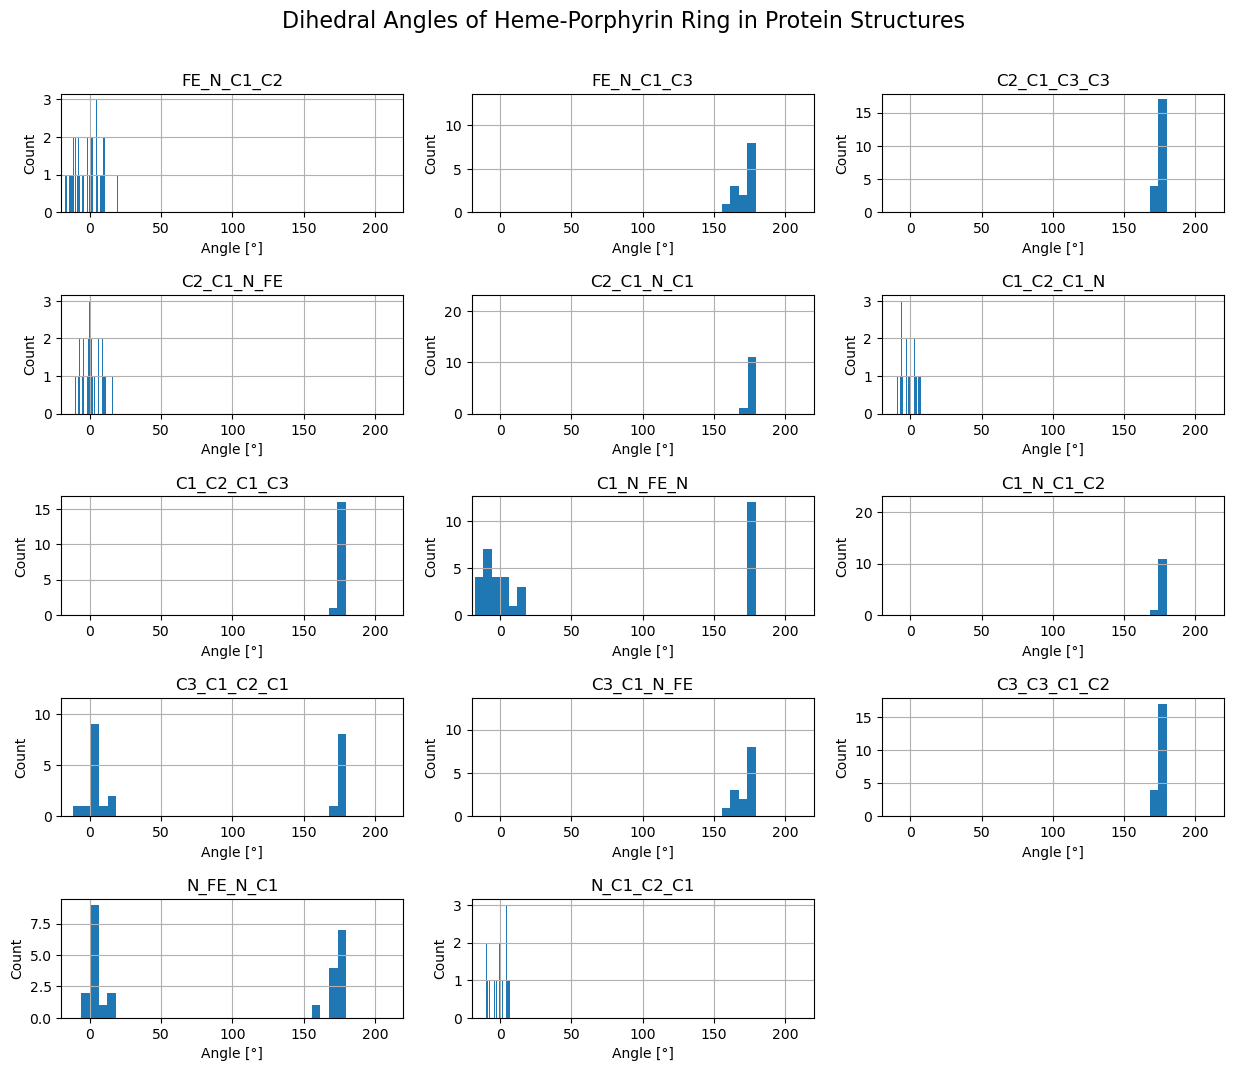

In [ ]:
#angles.histplot_all(data=dihe)
#angles.single_histplots(data=dihe)
angles.histplot_grid(data=dihe)

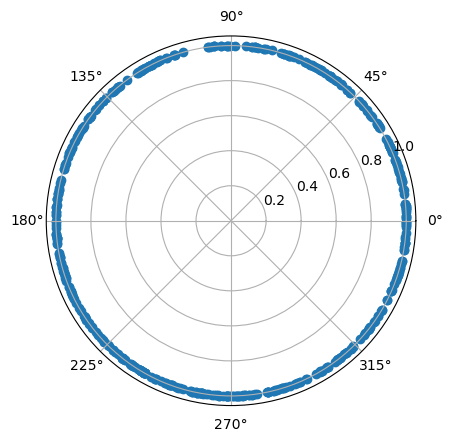

In [ ]:
#dist = pd.DataFrame(np.ones([37,14]))
#fig = plt.figure()
#ax = fig.add_subplot(projection="polar")
#c = ax.scatter(dihe.applymap(angles.transform_angles), dist)
#This makes no sense, why are all the data points shown somewhere they're not?